<a href="https://colab.research.google.com/github/SIDIBEMoussa/NLP-Trainings/blob/main/03_Exercice_LM_classification_and_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [459]:
import pandas as pd
from random import seed
from warnings import filterwarnings

filterwarnings('ignore')

seed(1999)

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [460]:
import pathlib, os

In [461]:
path = "/content/datasets/lda_sports_politics_docs"

file_directory = pathlib.Path(path).exists()

if not file_directory:

    !git clone https://github.com/selva86/datasets.git



text_files = os.listdir(path)

In [462]:
text_files

['shinzo abe.txt',
 'pizza.txt',
 'lee quan yew.txt',
 'queen elizabeth.txt',
 'cricket.txt',
 'idli.txt',
 'barack obama.txt',
 'baseball.txt',
 'badminton.txt',
 'noodles.txt',
 'tipu sultan.txt',
 'table tennis.txt',
 'pasta.txt',
 'narendra modi.txt',
 'dosa.txt']

In [463]:
articles=[]

for filename in text_files:

    article = pathlib.Path(path+'/'+filename).read_text()

    articles.append(article)

In [464]:
articles[0]

"Shinzō Abe (Abe Shinzō, IPA: born 21 September 1954) is the current Prime Minister of Japan, re-elected to the position in December 2012. Abe is also the President of the Liberal Democratic Party (LDP).\nAbe served for a year as Prime Minister, from 2006 to 2007. Hailing from a politically prominent family, at age 52, Abe became Japan's youngest post-war prime minister, and the first to be born after World War II, when he was elected by a special session of the National Diet in September 2006. Abe resigned on 12 September 2007, for health reasons. Abe was replaced by Yasuo Fukuda, beginning a string of five Prime Ministers, none of whom retained office for more than sixteen months, before Abe staged a political comeback.\nOn 26 September 2012, Abe defeated former Minister of Defense Shigeru Ishiba, in a run-off vote, to win the LDP Presidential Election. Following the LDP's landslide victory in the 2012 general election, Abe became the Prime Minister again. Abe is the first former Pri

In [465]:
from pprint import pprint # for printing objects nicely

from gensim import corpora, models
from gensim.utils import simple_preprocess

# from gensim.parsing.preprocessing import STOPWORDS 
# Instead of the gensim english stopwords, we use nltk's German stopwords
from nltk.corpus import stopwords

from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import *

import numpy as np

from random import choice

np.random.seed(1234)

stemmer = SnowballStemmer('english')
german_stop_words = set(stopwords.words('english'))


def lemmatize_stemming(text):
  return stemmer.stem(text)

def preprocess(text):
  result = [lemmatize_stemming(token) 
            for token in simple_preprocess(text)  
            if token not in german_stop_words and len(token) > 3]
  return result

In [466]:
print('original document: ')
article = choice(articles)
print(article)

# This time, we don't care about punctuations as tokens (Can you think why?):
print('original document, broken into words: ')
words = [word for word in article.split(' ')]
print(words)
print("Vocabulary size of the original article:", len(set(words)))

# now let's see what happens when we pass the article into our preprocessing 
# method:
print('\n\n tokenized and lemmatized document: ')
preprocessed_article = preprocess(article)
print(preprocessed_article)
print("Vocabulary size after preprocessing:", len(set(preprocessed_article)))

original document: 
Pizza is a flatbread generally topped with tomato sauce and cheese and baked in an oven. It is commonly topped with a selection of meats, vegetables and condiments. The term was first recorded in the 10th century, in a Latin manuscript from Gaeta in Central Italy. The modern pizza was invented in Naples, Italy, and the dish and its variants have since become popular in many areas of the world.
In 2009, upon Italy's request, Neapolitan pizza was safeguarded in the European Union as a Traditional Speciality Guaranteed dish. The Associazione Verace Pizza Napoletana (the True Neapolitan Pizza Association) is a non-profit organisation founded in 1984 with headquarters in Naples. It promotes and protects the "true Neapolitan pizza".
Pizza is sold fresh or frozen, either whole or in portions, and is a common fast food item in Europe and North America. Various types of ovens are used to cook them and many varieties exist. Several similar dishes are prepared from ingredients

In [467]:
processed_docs = list(map(preprocess, articles))
processed_docs[:2]

[['shinzō',
  'shinzō',
  'born',
  'septemb',
  'current',
  'prime',
  'minist',
  'japan',
  'elect',
  'posit',
  'decemb',
  'also',
  'presid',
  'liber',
  'democrat',
  'parti',
  'serv',
  'year',
  'prime',
  'minist',
  'hail',
  'polit',
  'promin',
  'famili',
  'becam',
  'japan',
  'youngest',
  'post',
  'prime',
  'minist',
  'first',
  'born',
  'world',
  'elect',
  'special',
  'session',
  'nation',
  'diet',
  'septemb',
  'resign',
  'septemb',
  'health',
  'reason',
  'replac',
  'yasuo',
  'fukuda',
  'begin',
  'string',
  'five',
  'prime',
  'minist',
  'none',
  'retain',
  'offic',
  'sixteen',
  'month',
  'stage',
  'polit',
  'comeback',
  'septemb',
  'defeat',
  'former',
  'minist',
  'defens',
  'shigeru',
  'ishiba',
  'vote',
  'presidenti',
  'elect',
  'follow',
  'landslid',
  'victori',
  'general',
  'elect',
  'becam',
  'prime',
  'minist',
  'first',
  'former',
  'prime',
  'minist',
  'return',
  'offic',
  'sinc',
  'shigeru',
  'yoshi

In [468]:
dictionary = corpora.Dictionary(processed_docs)

In [469]:
for idx, (k, v) in enumerate(dictionary.iteritems()):
    print(k, v)
    if idx >= 10:
        break

0 also
1 becam
2 begin
3 born
4 coalit
5 comeback
6 current
7 decemb
8 defeat
9 defens
10 democrat


### Model Hyperparameter tuning

In [470]:
## Model hyper parameters:

## These are the dictionary preparation parameters:
filter_tokens_if_container_documents_are_less_than = 5
filter_tokens_if_appeared_percentage_more_than = 0.526
keep_the_first_n_tokens=100000

## and the LDA Parameters: 
num_of_topics = 7

In [471]:
dictionary.filter_extremes(
        no_below=filter_tokens_if_container_documents_are_less_than, 
        no_above=filter_tokens_if_appeared_percentage_more_than, 
        keep_n=keep_the_first_n_tokens)

In [472]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

#bow_corpus[:1]

In [473]:
# randomly choose an article from the corpus:
sample_bow_doc = choice(bow_corpus)

print('The processed bag-of-word document is just pairs of (word_id, # of occurnces) and looks like this:')
print(sample_bow_doc, '\n\n')

print ('We peek in the dictionary: for each word_id, we get its assigned word:')
for word_id, word_freq in sample_bow_doc:
  real_word = dictionary[word_id]
  print(f'Word {word_id} ("{real_word}") appears {word_freq} time.')

The processed bag-of-word document is just pairs of (word_id, # of occurnces) and looks like this:
[(5, 2)] 


We peek in the dictionary: for each word_id, we get its assigned word:
Word 5 ("known") appears 2 time.


## LDA model using Bag-of-words

In [474]:
lda_model = models.LdaMulticore(bow_corpus, 
                                num_topics=num_of_topics, 
                                id2word=dictionary, 
                                passes=10, 
                                workers=2)

In [475]:
for idx, topic in lda_model.print_topics(num_of_topics):
    print(f'Topic: {idx} \t Words: {topic}')

Topic: 0 	 Words: 0.400*"also" + 0.400*"serv" + 0.050*"use" + 0.050*"general" + 0.050*"born" + 0.050*"known"
Topic: 1 	 Words: 0.167*"serv" + 0.167*"also" + 0.167*"use" + 0.167*"general" + 0.167*"known" + 0.167*"born"
Topic: 2 	 Words: 0.599*"serv" + 0.137*"general" + 0.123*"known" + 0.113*"born" + 0.014*"also" + 0.014*"use"
Topic: 3 	 Words: 0.441*"born" + 0.235*"also" + 0.235*"serv" + 0.029*"use" + 0.029*"general" + 0.029*"known"
Topic: 4 	 Words: 0.600*"use" + 0.297*"general" + 0.032*"serv" + 0.024*"also" + 0.024*"known" + 0.023*"born"
Topic: 5 	 Words: 0.413*"born" + 0.345*"general" + 0.146*"serv" + 0.077*"also" + 0.010*"use" + 0.010*"known"
Topic: 6 	 Words: 0.430*"known" + 0.366*"also" + 0.174*"use" + 0.010*"general" + 0.010*"serv" + 0.010*"born"


## TF / IDF

In [476]:
# initialize a tfidf from our corpus
tfidf = models.TfidfModel(bow_corpus)

# apply it on our corpus 
tfidf_corpus = tfidf[bow_corpus]

pprint(tfidf_corpus[0][:10])

[(0, 0.29563000552722885),
 (1, 0.7089076549032278),
 (2, 0.5912600110544577),
 (3, 0.2458951727453369)]


In [477]:
# the new tfidf corpus is just our corpus - but transformed. It has the same size of documents:
assert len(bow_corpus) == len(tfidf_corpus)

Now let's apply LDA on the tfidf corpus, with the same amount of topics.

You can play with the # of passes, if the model doesn't converge properly

In [478]:
lda_model_tfidf = models.LdaMulticore(tfidf_corpus, 
                                      num_topics=num_of_topics, 
                                      id2word=dictionary, 
                                      passes=10, 
                                      workers=4)

In [479]:
for idx, topic in lda_model_tfidf.print_topics(num_of_topics):
    print(f'Topic: {idx} \t Word: {topic}')

Topic: 0 	 Word: 0.167*"also" + 0.167*"serv" + 0.167*"known" + 0.167*"general" + 0.167*"born" + 0.167*"use"
Topic: 1 	 Word: 0.615*"known" + 0.078*"use" + 0.077*"general" + 0.077*"serv" + 0.077*"also" + 0.077*"born"
Topic: 2 	 Word: 0.167*"also" + 0.167*"serv" + 0.167*"known" + 0.167*"general" + 0.167*"use" + 0.167*"born"
Topic: 3 	 Word: 0.372*"born" + 0.301*"general" + 0.168*"serv" + 0.081*"known" + 0.058*"also" + 0.019*"use"
Topic: 4 	 Word: 0.434*"serv" + 0.266*"also" + 0.212*"born" + 0.030*"known" + 0.030*"use" + 0.030*"general"
Topic: 5 	 Word: 0.398*"use" + 0.212*"known" + 0.208*"also" + 0.109*"general" + 0.056*"serv" + 0.016*"born"
Topic: 6 	 Word: 0.168*"born" + 0.167*"known" + 0.167*"use" + 0.167*"also" + 0.166*"general" + 0.165*"serv"


## Inference

Now that we have a topic-modeler, let's use it on one of the articles.

In [480]:
# randomly pick an article:
test_doc = choice(range(len(processed_docs)))
processed_docs[test_doc][:10]

['kuan',
 'gcmg',
 'spmj',
 'born',
 'harri',
 'kuan',
 'septemb',
 'march',
 'inform',
 'known']

Using the original BOW model:

In [481]:
for index, score in sorted(lda_model[bow_corpus[test_doc]], key=lambda tup: -1*tup[1]):
    print(f"Topic match score: {score} \nTopic: {lda_model.print_topic(index, num_of_topics)}")


Topic match score: 0.8565735816955566 
Topic: 0.599*"serv" + 0.137*"general" + 0.123*"known" + 0.113*"born" + 0.014*"also" + 0.014*"use"
Topic match score: 0.024039827287197113 
Topic: 0.413*"born" + 0.345*"general" + 0.146*"serv" + 0.077*"also" + 0.010*"use" + 0.010*"known"
Topic match score: 0.023947512730956078 
Topic: 0.441*"born" + 0.235*"also" + 0.235*"serv" + 0.029*"use" + 0.029*"general" + 0.029*"known"
Topic match score: 0.023927561938762665 
Topic: 0.430*"known" + 0.366*"also" + 0.174*"use" + 0.010*"general" + 0.010*"serv" + 0.010*"born"
Topic match score: 0.023867739364504814 
Topic: 0.600*"use" + 0.297*"general" + 0.032*"serv" + 0.024*"also" + 0.024*"known" + 0.023*"born"
Topic match score: 0.023832909762859344 
Topic: 0.400*"also" + 0.400*"serv" + 0.050*"use" + 0.050*"general" + 0.050*"born" + 0.050*"known"
Topic match score: 0.02381085604429245 
Topic: 0.167*"serv" + 0.167*"also" + 0.167*"use" + 0.167*"general" + 0.167*"known" + 0.167*"born"


And with the TF/IDF model:

In [482]:
for index, score in sorted(lda_model_tfidf[bow_corpus[test_doc]], key=lambda tup: -1*tup[1]):
    print("Topic match score: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, num_of_topics)))

Topic match score: 0.8025507926940918	 
Topic: 0.372*"born" + 0.301*"general" + 0.168*"serv" + 0.081*"known" + 0.058*"also" + 0.019*"use"
Topic match score: 0.07811284065246582	 
Topic: 0.615*"known" + 0.078*"use" + 0.077*"general" + 0.077*"serv" + 0.077*"also" + 0.077*"born"
Topic match score: 0.02398836612701416	 
Topic: 0.434*"serv" + 0.266*"also" + 0.212*"born" + 0.030*"known" + 0.030*"use" + 0.030*"general"
Topic match score: 0.023914337158203125	 
Topic: 0.398*"use" + 0.212*"known" + 0.208*"also" + 0.109*"general" + 0.056*"serv" + 0.016*"born"
Topic match score: 0.023811286315321922	 
Topic: 0.168*"born" + 0.167*"known" + 0.167*"use" + 0.167*"also" + 0.166*"general" + 0.165*"serv"
Topic match score: 0.023811182007193565	 
Topic: 0.167*"also" + 0.167*"serv" + 0.167*"known" + 0.167*"general" + 0.167*"born" + 0.167*"use"
Topic match score: 0.023811182007193565	 
Topic: 0.167*"also" + 0.167*"serv" + 0.167*"known" + 0.167*"general" + 0.167*"use" + 0.167*"born"


In [483]:
print('Perplexity: ', lda_model.log_perplexity(bow_corpus)) 
print('Perplexity TFIDF: ', lda_model_tfidf.log_perplexity(bow_corpus)) 

Perplexity:  -2.575956247363411
Perplexity TFIDF:  -2.681679596503576


In [454]:
import matplotlib.pyplot as plt

def optimize_topic(processed_docs,max_num_topic,num_more_than):

    perplexity_bow = {}
    perplexity_tfidf = {}

    for more_than in np.linspace(0.0001,1,num_more_than):
        keep_the_first_n_tokens = 10000

        dictionary = corpora.Dictionary(processed_docs)

        dictionary.filter_extremes(
            no_below=6, 
            no_above=more_than, 
            keep_n=keep_the_first_n_tokens)
        
        bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

        # initialize a tfidf from our corpus
        tfidf = models.TfidfModel(bow_corpus)

        # apply it on our corpus 
        tfidf_corpus = tfidf[bow_corpus]
        if dictionary.keys() != []:

            for num_topic in range(2, max_num_topic):

                  lda_model = models.LdaMulticore(bow_corpus, 
                                        num_topics=num_topic, 
                                        id2word=dictionary,
                                        passes=10, 
                                        workers=2)
                  
                  lda_model_tfidf = models.LdaMulticore(tfidf_corpus, 
                                              num_topics=num_topic, 
                                              id2word=dictionary, 
                                              passes=10, 
                                              workers=4)
                  
                  perplexity_bow[num_topic] = lda_model.log_perplexity(bow_corpus)

                  perplexity_tfidf[num_topic] = lda_model_tfidf.log_perplexity(tfidf_corpus)

            print("no_above: ",more_than)
            plt.plot(list(perplexity_bow.keys()),list(perplexity_bow.values()),"b",label = "bow")
            plt.plot(list(perplexity_tfidf.keys()),list(perplexity_tfidf.values()), "g", label = "tfidf")

            plt.show()
    
    return 0



          

no_above:  0.4211105263157895


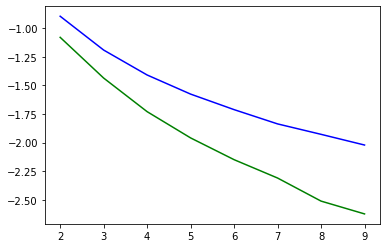

no_above:  0.4737368421052632


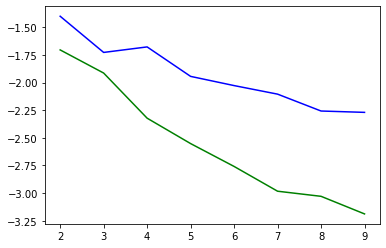

no_above:  0.5263631578947369


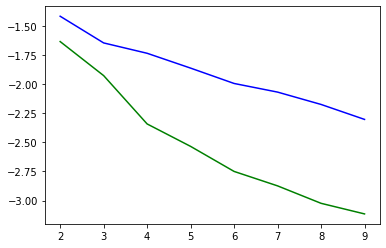

no_above:  0.5789894736842105


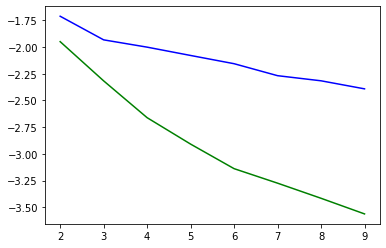

no_above:  0.6316157894736842


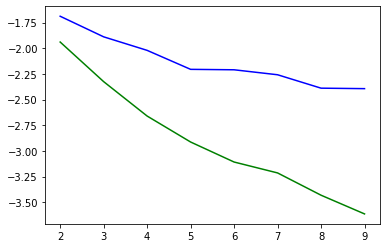

no_above:  0.684242105263158


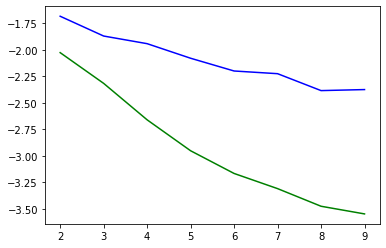

no_above:  0.7368684210526316


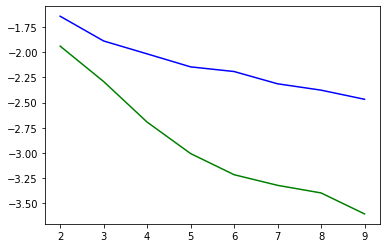

no_above:  0.7894947368421052


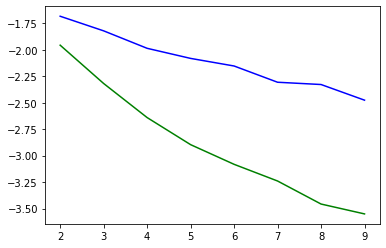

no_above:  0.842121052631579


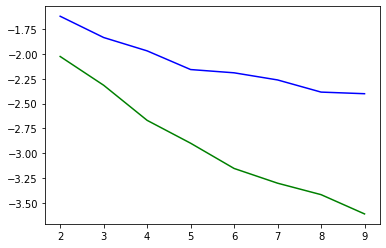

no_above:  0.8947473684210527


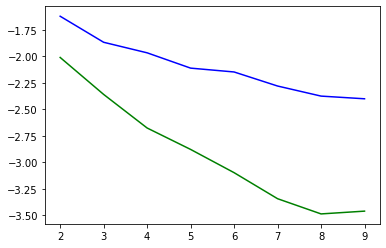

no_above:  0.9473736842105264


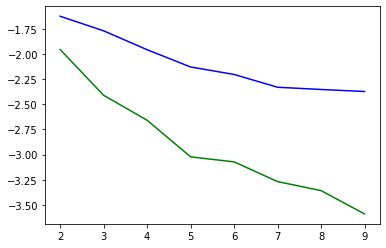

no_above:  1.0


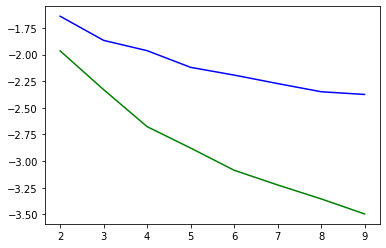

0

In [455]:
optimize_topic(processed_docs,max_num_topic = 10,num_more_than = 20)

### Exercise - inference

Now try it on a new document!

Go to a news website, such as [orf.at](https://orf.at/) and copy an article of your choice here:

In [456]:
#https://www.lemonde.fr/en/opinion/article/2022/12/27/speaking-the-truth-about-immigration_6009281_23.html

unseen_document = """You can share an article by clicking on the share icons at the top right of it. 
The total or partial reproduction of an article, without the prior written authorization of Le Monde, is strictly forbidden. 
For more information, see our Terms and Conditions. 
For all authorization requests, contact droitsdauteur@lemonde.fr. 

The French reversal may have only a remote connection to migration issues. In each of the target countries,
visa restrictions fueled strong criticism of France. But in a context of rising anti-French sentiment throughout
Africa and faced with the risk of emerging countries leaving the Western bloc, Paris was able to give precedence
to these fundamental concerns over the math of deportations. Other bilateral issues (Western Sahara, gas, etc.),
as well as the difficulty of giving in to Morocco without doing the same for Algeria, may also have played roles.
The equation cannot be summed up as a simple trade-off between visas and deportations, because relations between 
France and its former colonies, marked by the presence of large communities of Maghrebi origin, are a matter of 
both foreign policy and domestic affairs."""

bow_vector = dictionary.doc2bow(preprocess(unseen_document))

print("Simply printing the lda_model output would look like this:")
pprint(lda_model[bow_vector])

print("\n\nSo let's make it nicer, by printing the topic contents:")
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))


Simply printing the lda_model output would look like this:
[(0, 0.07143178),
 (1, 0.5714022),
 (2, 0.07142863),
 (3, 0.07143178),
 (4, 0.07144477),
 (5, 0.071429476),
 (6, 0.071431436)]


So let's make it nicer, by printing the topic contents:
Score: 0.5714021325111389	 Topic: 0.965*"also" + 0.017*"serv" + 0.017*"general"
Score: 0.07144481688737869	 Topic: 0.384*"also" + 0.335*"serv" + 0.281*"general"
Score: 0.07143177837133408	 Topic: 0.333*"serv" + 0.333*"also" + 0.333*"general"
Score: 0.07143177837133408	 Topic: 0.333*"serv" + 0.333*"general" + 0.333*"also"
Score: 0.07143143564462662	 Topic: 0.349*"serv" + 0.331*"general" + 0.320*"also"
Score: 0.07142947614192963	 Topic: 0.807*"general" + 0.167*"serv" + 0.026*"also"
Score: 0.07142862677574158	 Topic: 0.967*"serv" + 0.017*"also" + 0.016*"general"


## Visualization

In [457]:
! pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [458]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

bow_lda_data = gensimvis.prepare(lda_model, bow_corpus, dictionary)

pyLDAvis.display(bow_lda_data)